<a href="https://colab.research.google.com/github/bipasha4593/ShadowFox/blob/main/healthcare_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
base_data = pd.read_csv('/content/Data (1).csv')

In [ ]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86323,5.376193e+13,5758391,F,2016-06-01T10:41:23Z,2016-06-01T00:00:00Z,49,BELA VISTA,0,1,0,0,0.0,0.0,No
86324,6.224675e+13,5698003,F,2016-05-16T07:08:41Z,2016-06-01T00:00:00Z,70,SANTO ANTÔNIO,0,0,0,0,0.0,1.0,Yes
86325,3.418993e+12,5700307,F,2016-05-16T09:19:54Z,2016-06-08T00:00:00Z,49,MÁRIO CYPRESTE,1,1,0,0,0.0,1.0,No
86326,7.288535e+13,5698249,M,2016-05-16T07:24:20Z,2016-06-01T00:00:00Z,28,MÁRIO CYPRESTE,0,0,0,0,0.0,1.0,No


In [ ]:
base_data.shape

(86328, 14)

In [ ]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       86328 non-null  float64
 1   AppointmentID   86328 non-null  int64  
 2   Gender          86328 non-null  object 
 3   ScheduledDay    86328 non-null  object 
 4   AppointmentDay  86328 non-null  object 
 5   Age             86328 non-null  int64  
 6   Neighbourhood   86328 non-null  object 
 7   Scholarship     86328 non-null  int64  
 8   Hipertension    86328 non-null  int64  
 9   Diabetes        86328 non-null  int64  
 10  Alcoholism      86328 non-null  int64  
 11  Handcap         86327 non-null  float64
 12  SMS_received    86327 non-null  float64
 13  No-show         86327 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 9.2+ MB


In [ ]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No


In [ ]:
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [ ]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [ ]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    21185
2    18122
0    17832
4    15019
3    14148
5       22
Name: count, dtype: int64

In [ ]:
base_data['app_weekday'].value_counts()

app_weekday
1    21582
0    18483
2    17535
4    15393
3    13296
5       39
Name: count, dtype: int64

In [ ]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [ ]:
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [ ]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [ ]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       86328 non-null  float64       
 1   AppointmentID   86328 non-null  int64         
 2   Gender          86328 non-null  object        
 3   ScheduledDay    86328 non-null  datetime64[ns]
 4   AppointmentDay  86328 non-null  datetime64[ns]
 5   Age             86328 non-null  int64         
 6   Neighbourhood   86328 non-null  object        
 7   Scholarship     86328 non-null  int64         
 8   Hypertension    86328 non-null  int64         
 9   Diabetes        86328 non-null  int64         
 10  Alcoholism      86328 non-null  int64         
 11  Handicap        86327 non-null  float64       
 12  SMSReceived     86327 non-null  float64       
 13  NoShow          86327 non-null  object        
 14  sch_weekday     86328 non-null  int32         
 15  ap

In [ ]:
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [ ]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0.0,0.0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0.0,0.0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0.0,0.0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0.0,0.0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0.0,0.0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86323,F,2016-06-01,2016-06-01,49,0,1,0,0,0.0,0.0,No,2,2
86324,F,2016-05-16,2016-06-01,70,0,0,0,0,0.0,1.0,Yes,0,2
86325,F,2016-05-16,2016-06-08,49,1,1,0,0,0.0,1.0,No,0,2
86326,M,2016-05-16,2016-06-01,28,0,0,0,0,0.0,1.0,No,0,2


In [ ]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          86328 non-null  object        
 1   ScheduledDay    86328 non-null  datetime64[ns]
 2   AppointmentDay  86328 non-null  datetime64[ns]
 3   Age             86328 non-null  int64         
 4   Scholarship     86328 non-null  int64         
 5   Hypertension    86328 non-null  int64         
 6   Diabetes        86328 non-null  int64         
 7   Alcoholism      86328 non-null  int64         
 8   Handicap        86327 non-null  float64       
 9   SMSReceived     86327 non-null  float64       
 10  NoShow          86327 non-null  object        
 11  sch_weekday     86328 non-null  int32         
 12  app_weekday     86328 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(2), int64(5), object(2)
memory usage: 7.9+ MB


In [ ]:
base_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,86328,86328,86328.000000,86328.000000,86328.000000,86328.000000,86328.000000,86327.000000,86327.000000,86328.000000,86328.000000
mean,2016-05-04 07:13:56.697247744,2016-05-14 09:52:51.643036160,37.019310,0.098103,0.196333,0.071101,0.029735,0.022218,0.290071,1.854080,1.833785
min,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-28 00:00:00,2016-05-06 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-06 00:00:00,2016-05-13 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-16 00:00:00,2016-05-20 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.102883,0.297455,0.397225,0.256995,0.169857,0.160702,0.453798,1.382917,1.396467


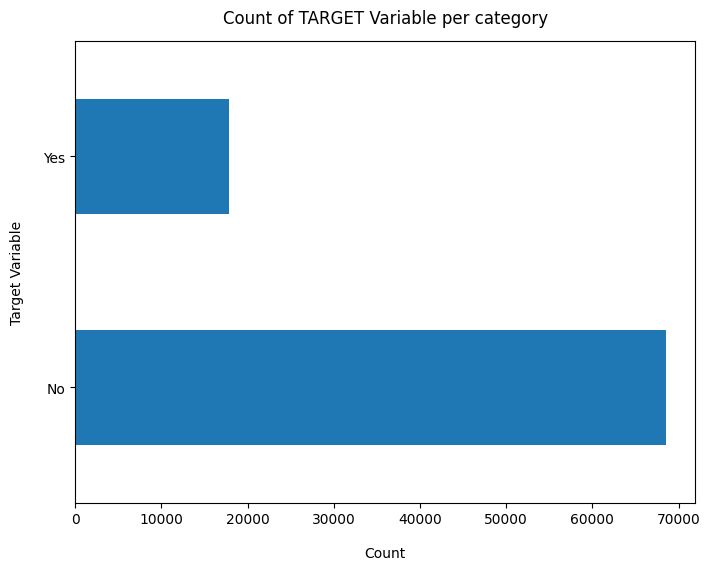

In [ ]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

NoShow
No     79.358957
Yes    20.639885
Name: count, dtype: float64

In [ ]:
base_data['NoShow'].value_counts()

NoShow
No     68509
Yes    17818
Name: count, dtype: int64

In [ ]:
new_data = base_data.copy()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          86328 non-null  object        
 1   ScheduledDay    86328 non-null  datetime64[ns]
 2   AppointmentDay  86328 non-null  datetime64[ns]
 3   Age             86328 non-null  int64         
 4   Scholarship     86328 non-null  int64         
 5   Hypertension    86328 non-null  int64         
 6   Diabetes        86328 non-null  int64         
 7   Alcoholism      86328 non-null  int64         
 8   Handicap        86327 non-null  float64       
 9   SMSReceived     86327 non-null  float64       
 10  NoShow          86327 non-null  object        
 11  sch_weekday     86328 non-null  int32         
 12  app_weekday     86328 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(2), int64(5), object(2)
memory usage: 7.9+ MB


In [ ]:
print(base_data['Age'].max())

115


In [ ]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]
base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [ ]:
base_data.drop(['Age'], axis=1, inplace=True)

In [ ]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    56044
M    30284
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-02    4063
2016-05-03    3983
2016-05-05    3789
2016-05-10    3704
2016-04-29    3655
              ... 
2015-12-03       1
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-04-09       1
Name: count, Length: 106, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-05-11    4474
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-06-03     464
2016-06-06     460
2016-06-02     359
2016-06-07     358
2016-06-01     309
2016-06-08     302
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

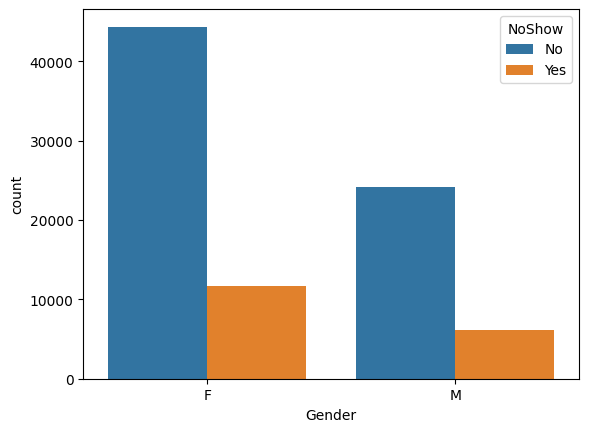

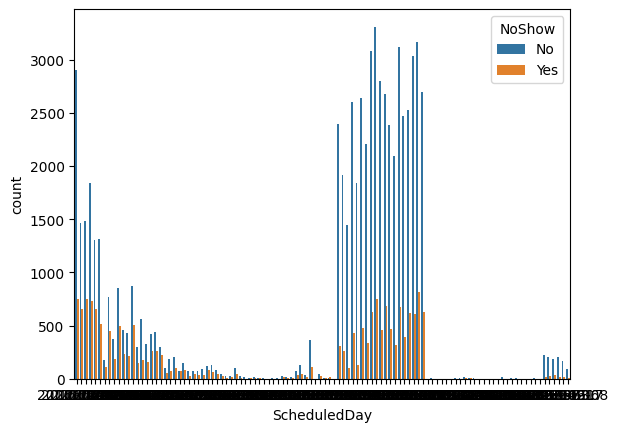

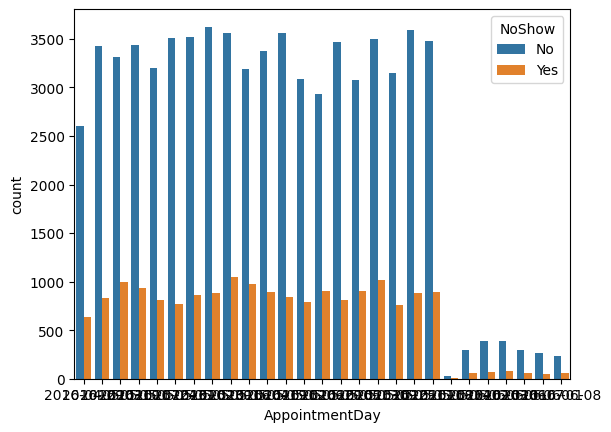

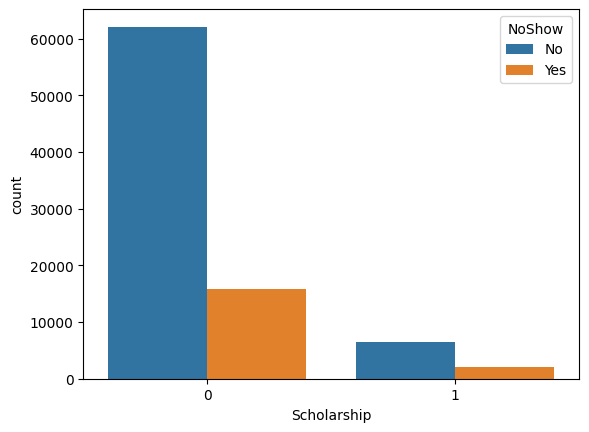

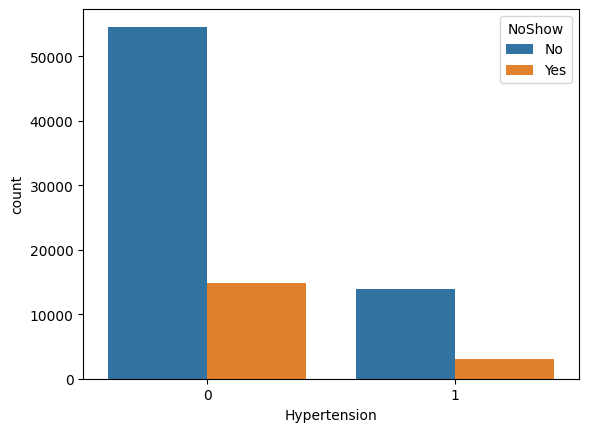

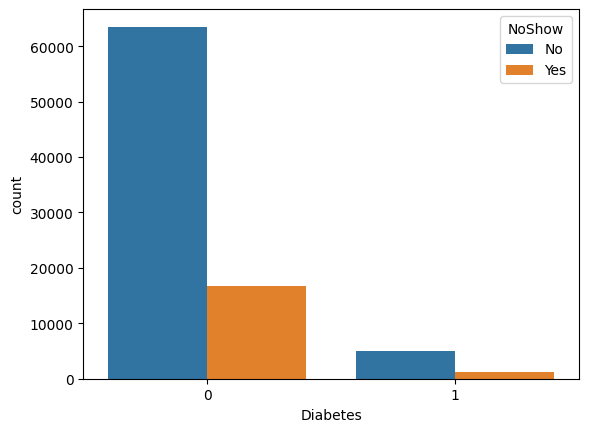

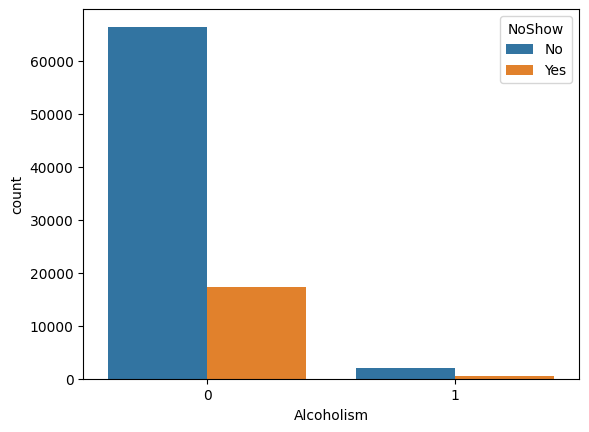

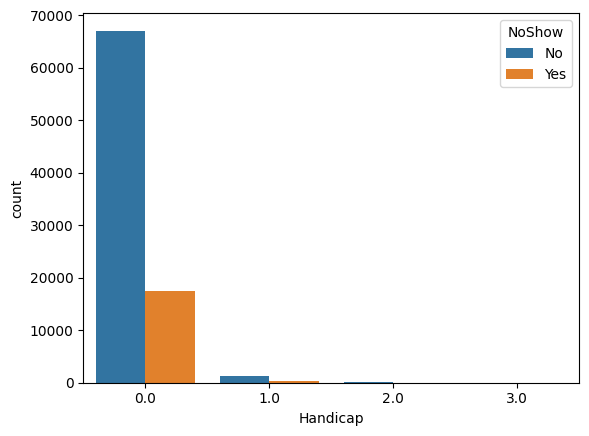

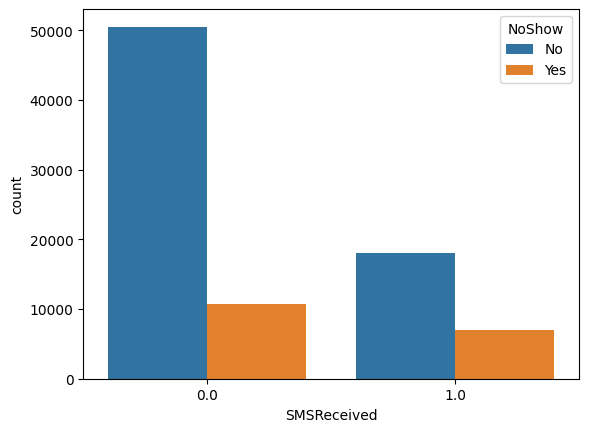

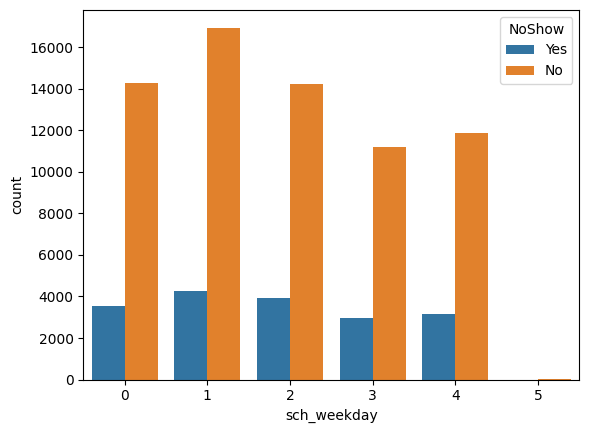

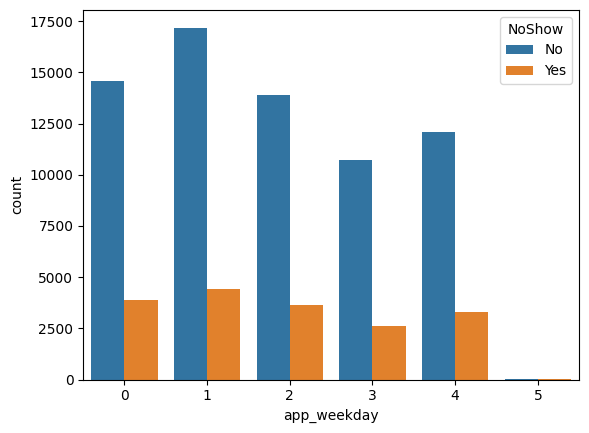

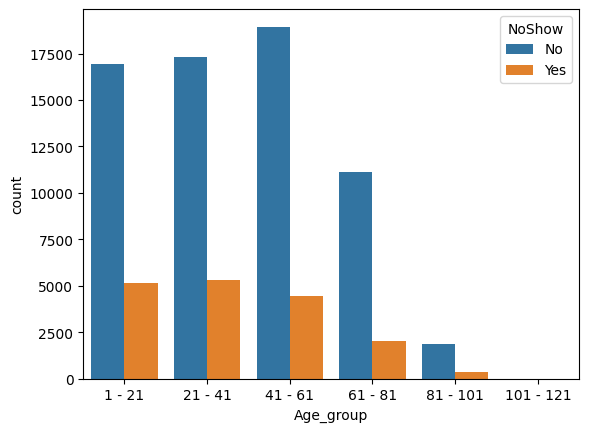

In [ ]:
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [ ]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [ ]:
base_data.NoShow.value_counts()

NoShow
0    68510
1    17818
Name: count, dtype: int64

In [ ]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0.0,0.0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

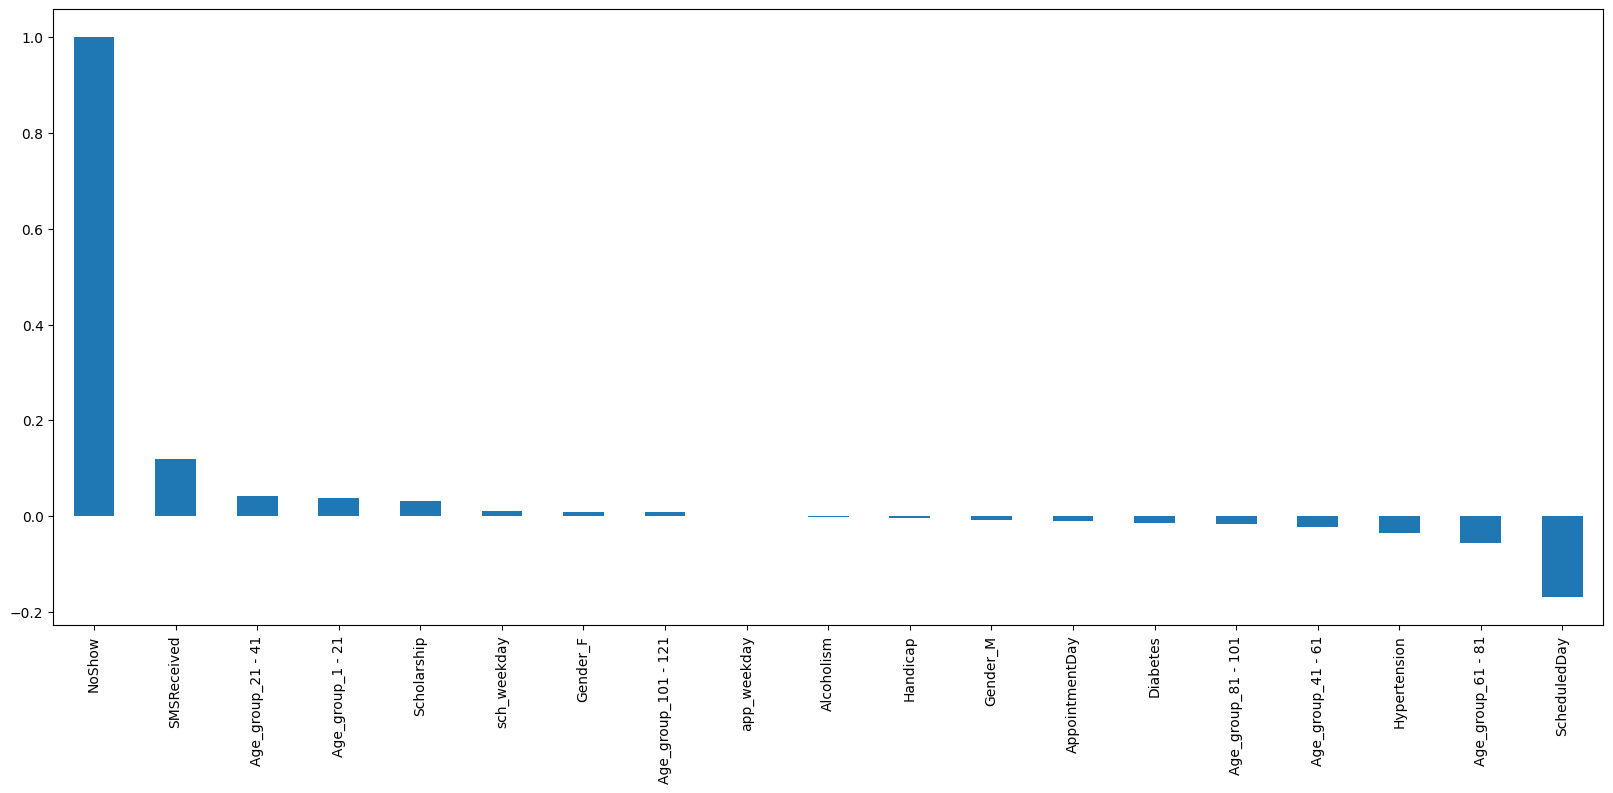

In [ ]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [ ]:
base_data.NoShow.value_counts()

NoShow
0    86328
Name: count, dtype: int64

In [ ]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0.0,0.0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0.0,0.0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

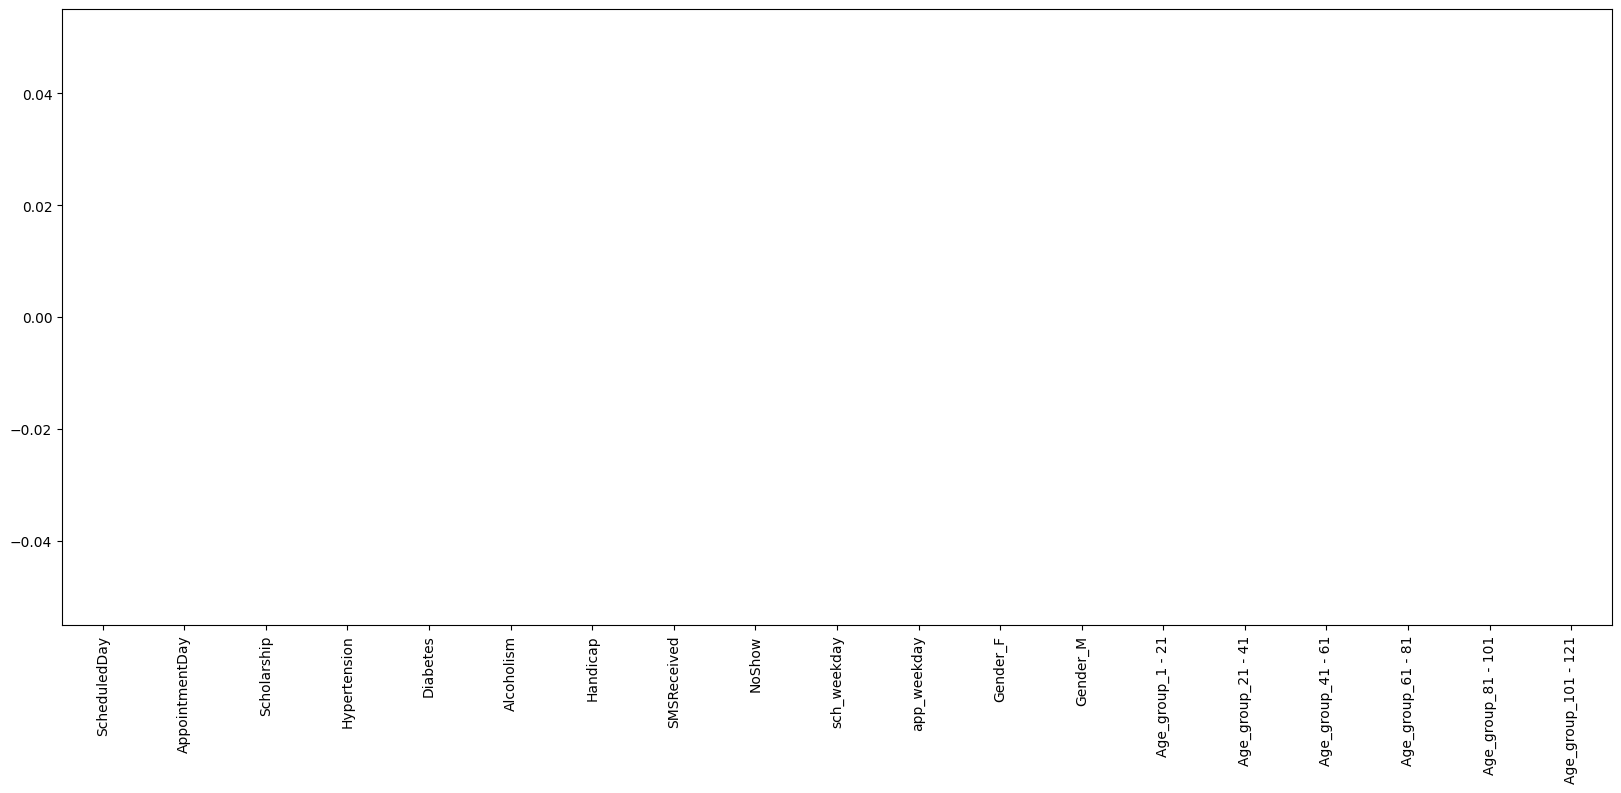

In [ ]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

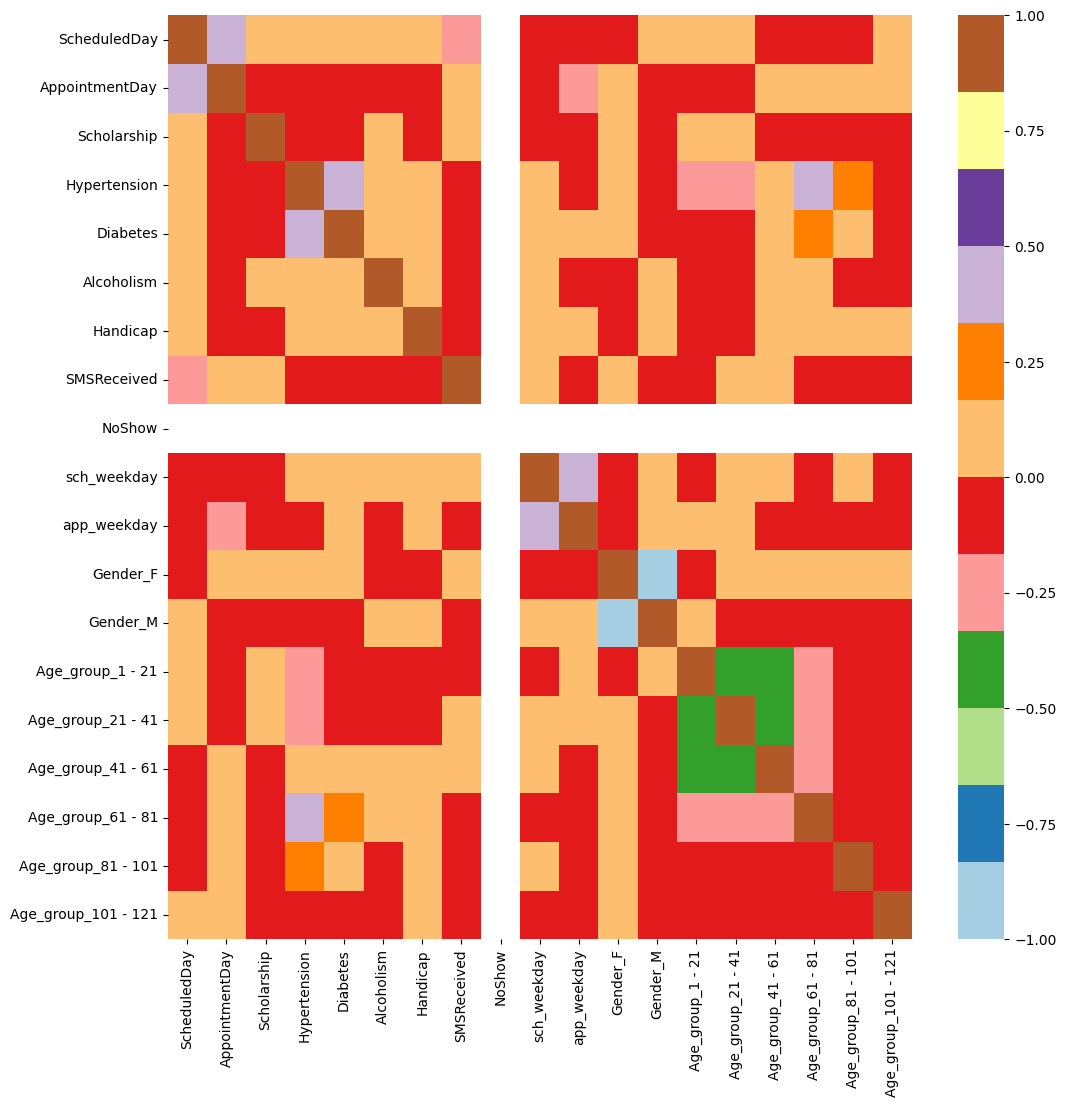

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")